# Beginner Seaborn
## Most of the information comes from the data visualization kaggle course
> [Kaggle data visualization course](https://www.kaggle.com/learn/data-visualization)

> **data** is stored in ./data/sns-beginner

> Link to [dataset](https://www.kaggle.com/alexisbcook/data-for-datavis)

***

1. [Quick overview](#Quick-overview)

    - [Quick examples of each type](#Quick-examples-of-each-type)

2. [Line Charts](#Line-Charts)

    - [Lineplot](#Lineplot)
    
3. [Bar charts](#Bar-charts)

    - [Barplot](#Barplot)
    
    - [Heatmap](#Heatmap)
    
4. [Scatter plots](#Scatter-plots)

    - [scatterplot](#scatterplot)
    
    - [regplot](#regplot)
    
    - [lmplot](#lmplot)
    
    - [swarmplot](#swarmplot)
    
5. [Distributions](#Distributions)

    - [Histograms](#Histograms)
    
    - [Density](#Density)
    
    - [2D KDE plots (from displot)](#2D-KDE-plots-(from-displot))
    
6. [Color-coded plots](#Color-coded-plots)
***


In [156]:
# dependencies
import pandas as pd
pd.set_option('display.max_rows', 5)

import matplotlib.pyplot as plt
import seaborn as sns

# magic
%matplotlib inline

In [299]:
# load df
import os

if not os.path.exists('../../pandas-way/data/sns-beginner/'):
    print('bad path for df')
else:
    df_museum = pd.read_csv('../../pandas-way/data/sns-beginner/museum_visitors.csv', index_col='Date', parse_dates=True)
    df_flight_delay = pd.read_csv('../../pandas-way/data/sns-beginner/flight_delays.csv', index_col='Month')
    df_insurance = pd.read_csv('../../pandas-way/data/sns-beginner/insurance.csv')
    df_iris = pd.read_csv('../../pandas-way/data/sns-beginner/iris.csv', index_col='Id')
    df_iris_set_data = pd.read_csv('../../pandas-way/data/sns-beginner/iris_setosa.csv', index_col="Id")
    df_iris_ver_data = pd.read_csv('../../pandas-way/data/sns-beginner/iris_versicolor.csv', index_col="Id")
    df_iris_vir_data = pd.read_csv('../../pandas-way/data/sns-beginner/iris_virginica.csv', index_col="Id")

***

## Quick overview 

- **Trends** - A trend is defined as a pattern of change.
    - `sns.lineplot` - **Line charts** are best to show trends over a period of time, and multiple lines can be used to show trends in more than one group.
- **Relationship** - There are many different chart types that you can use to understand relationships between variables in your data.
    - `sns.barplot` - **Bar charts** are useful for comparing quantities corresponding to different groups.
    - `sns.heatmap` - **Heatmaps** can be used to find color-coded patterns in tables of numbers.
    - `sns.scatterplot` - **Scatter plots** show the relationship between two continuous variables; if color-coded, we can also show the relationship with a third [categorical variable](https://en.wikipedia.org/wiki/Categorical_variable).
    - `sns.regplot` - Including a **regression line** in the scatter plot makes it easier to see any linear relationship between two variables.
    - `sns.lmplot` - This command is useful for drawing multiple regression lines, if the scatter plot contains multiple, color-coded groups.
    - `sns.swarmplot` - **Categorical scatter plots** show the relationship between a continuous variable and a categorical variable.
- **Distribution** - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
    - `sns.displot` - **Histograms/kde/ecdf** show the distribution in different types.


![plots](./different_plots.png)

## Quick examples of each type

Text(0.5, 1.0, 'regplot')

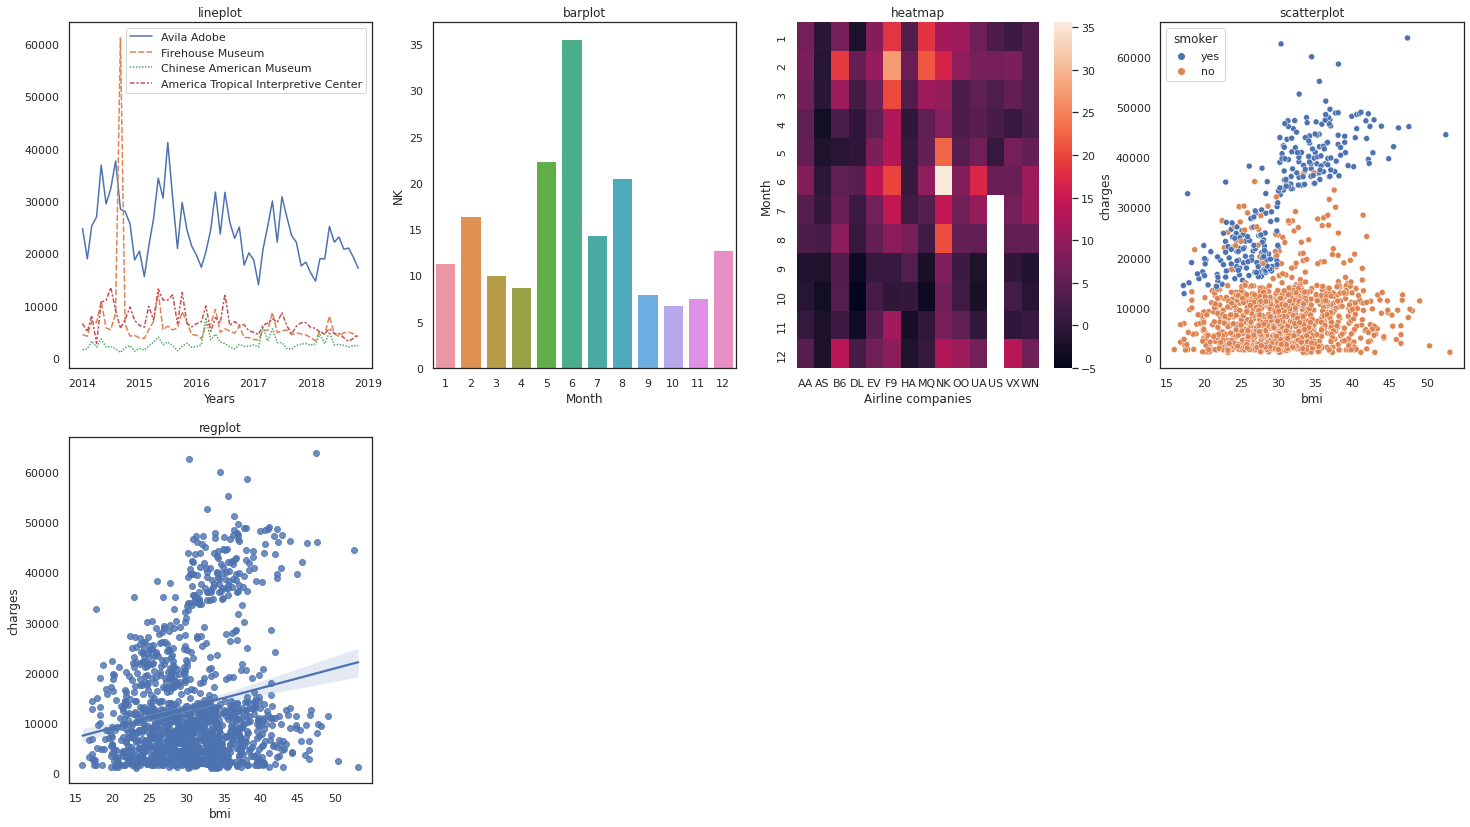

In [334]:
### EXAMPLES OF CREATING VISUALIZATION
plt.subplots(1, 5, figsize=(25, 14))

plt.subplot(2, 4, 1)
sns.lineplot(data=df_museum)
plt.title('lineplot')
plt.xlabel('Years')

plt.subplot(2, 4, 2)
sns.barplot(x=df_flight_delay.index, y=df_flight_delay.NK)
plt.title('barplot')

plt.subplot(2, 4, 3)
sns.heatmap(data=df_flight_delay, annot=False)
plt.title('heatmap')
plt.xlabel('Airline companies')

plt.subplot(2, 4, 4)
sns.scatterplot(x=df_insurance.bmi, y=df_insurance.charges, hue=df_insurance.smoker)
plt.title('scatterplot')

plt.subplot(2, 4, 5)
sns.regplot(x=df_insurance.bmi, y=df_insurance.charges)
plt.title('regplot')

#### matplotlib and its objects are completely unaware of seaborn functions.

# plt.subplot(2, 4, 6)
# sns.lmplot(x="bmi", y="charges", hue="smoker", data=df_insurance, ax=axes[6])
# plt.title('lmplot')

# plt.subplot(2, 4, 7)
# sns.swarmplot(x=df_insurance.smoker, y=df_insurance.charges, )
# plt.title('swarmplot')

# plt.subplot(2, 4, 8)
# sns.displot(data=df_iris['Petal Length (cm)'], kind='hist', height=5, aspect=2)
# plt.title('displot')

### Line Charts
***
#### Lineplot
 
> `seaborn.lineplot`__(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)__

> **[lineplot seaborn wiki](https://seaborn.pydata.org/generated/seaborn.lineplot.html)**

Parameters (some important):

> **x, y : vectors or keys in** `data`
    
Variables that specify positions on the x and y axes.

> **hue : vector or key in** `data`

Grouping variable that will produce lines with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

> **size : vector or key in** `data`

Grouping variable that will produce lines with different widths. Can be either categorical or numeric, although size mapping will behave differently in latter case.

> **style : vector or key in** `data`

Grouping variable that will produce lines with different dashes and/or markers. Can have a numeric dtype but will always be treated as categorical.

> **data :**`pandas.DataFrame`, `numpy.ndarray`**, mapping, or sequence**

Input data structure. Either a long-form collection of vectors that can be assigned to named variables or a wide-form dataset that will be internally reshaped.

> **palette : string, list, dict, or** `matplotlib.colors.Colormap`

Method for choosing the colors to use when mapping the hue semantic. String values are passed to color_palette(). List or dict values imply categorical mapping, while a colormap object implies numeric mapping.

In [169]:
df_museum.head()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694


Text(0, 0.5, 'Visitors')

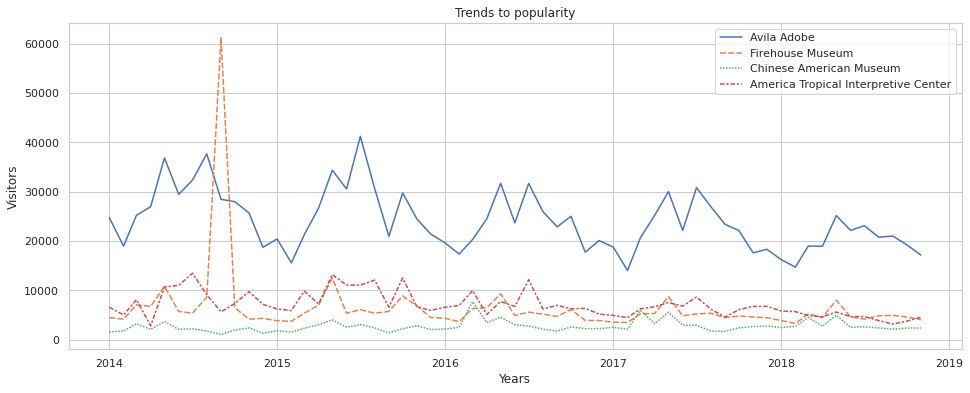

In [188]:
# change size
plt.figure(figsize=(16,6))
# change style
sns.set_style('whitegrid')

# lineplot
sns.lineplot(data=df_museum)

# make title
plt.title('Trends to popularity')
# make axis
plt.xlabel('Years')
plt.ylabel('Visitors')

### Bar charts
***
#### Barplot

> `seaborn.barplot`__(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7ff320f315e0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)__

> **[barplot seaborn wiki](https://seaborn.pydata.org/generated/seaborn.barplot.html)**

Parameters (some important):

> **x, y, hue : names of variables in** `data` **or vector data, optional**
    
Inputs for plotting long-form data. See examples for interpretation.

> **data : DataFrame, array, or list of arrays, optional**

Dataset for plotting. If x and y are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form.

> **order, hue_order : lists of strings, optional**

Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

> **estimator : callable that maps vector -> scalar, optional**

Statistical function to estimate within each categorical bin.

In [189]:
df_flight_delay.head()

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


Text(0.5, 1.0, 'Average delay time for Spirit Airlines, by Months')

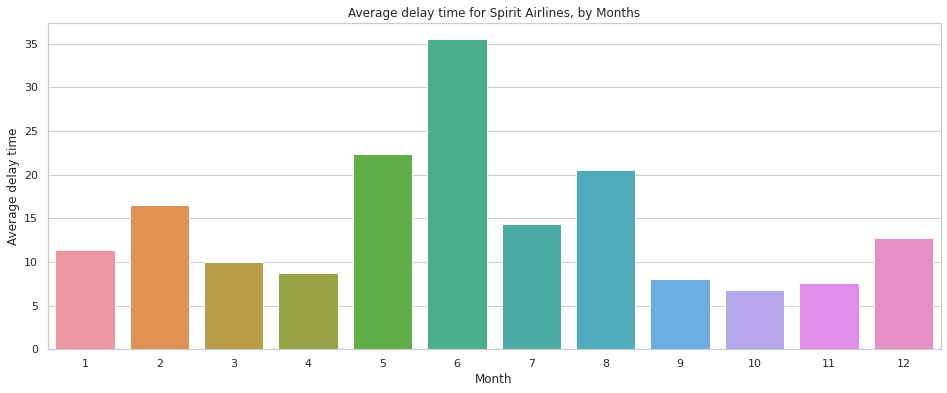

In [190]:
# change size
plt.figure(figsize=(16,6))
# change style
sns.set_style('whitegrid')

# barplot
sns.barplot(x=df_flight_delay.index, y=df_flight_delay.NK)

# make y-axis
plt.ylabel('Average delay time')
# make title
plt.title('Average delay time for Spirit Airlines, by Months')

#### Heatmap

> `seaborn.heatmap`__(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)__

> **[heatmap seaborn wiki](https://seaborn.pydata.org/generated/seaborn.heatmap.html)**

Parameters (some important):

> **data : rectangular dataset**

2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.

> **annot : bool or rectangular dataset, optional**

If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.

<AxesSubplot:ylabel='Month'>

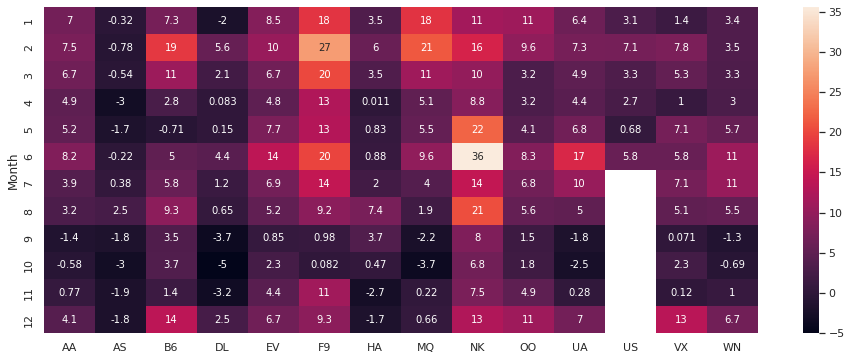

In [194]:
# change size
plt.figure(figsize=(16,6))

sns.heatmap(data=df_flight_delay, annot=True)

### Scatter plots
***
#### scatterplot

> `seaborn.scatterplot`__(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)__

> **[scatterplot seaborn wiki](https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot)**

Parameters (some important):

> **x, y : vectors or keys in** `data`
    
Variables that specify positions on the x and y axes.

> **hue : vector or key in** `data`

Grouping variable that will produce lines with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

> **size : vector or key in** `data`

Grouping variable that will produce lines with different widths. Can be either categorical or numeric, although size mapping will behave differently in latter case.

> **style : vector or key in** `data`

Grouping variable that will produce lines with different dashes and/or markers. Can have a numeric dtype but will always be treated as categorical.

> **data :**`pandas.DataFrame`, `numpy.ndarray`**, mapping, or sequence**

Input data structure. Either a long-form collection of vectors that can be assigned to named variables or a wide-form dataset that will be internally reshaped.

> **palette : string, list, dict, or** `matplotlib.colors.Colormap`

Method for choosing the colors to use when mapping the hue semantic. String values are passed to color_palette(). List or dict values imply categorical mapping, while a colormap object implies numeric mapping.

In [193]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='bmi', ylabel='charges'>

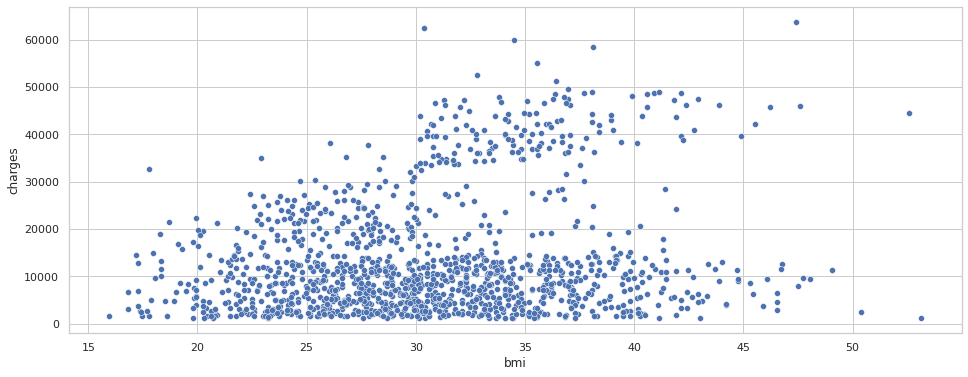

In [196]:
# change size
plt.figure(figsize=(16,6))

sns.scatterplot(x=df_insurance.bmi, y=df_insurance.charges)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

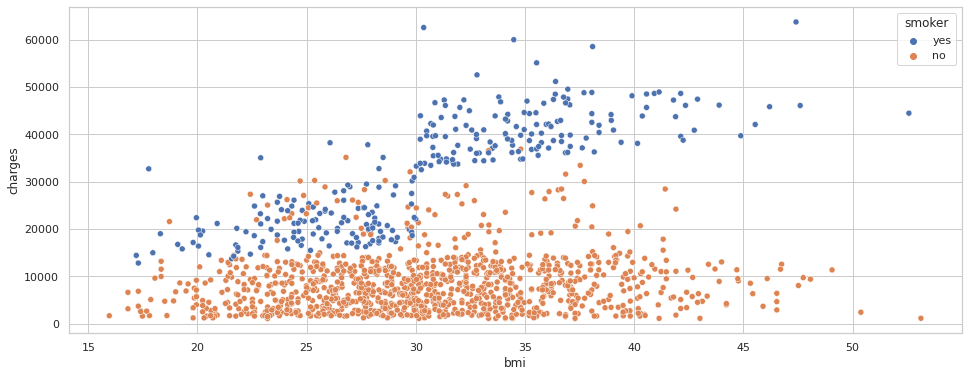

In [205]:
plt.figure(figsize=(16,6))

sns.scatterplot(x=df_insurance.bmi, y=df_insurance.charges, hue=df_insurance.smoker)

#### regplot

> `seaborn.regplot`__(*, x=None, y=None, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)__

> **[regplot seaborn wiki](https://seaborn.pydata.org/generated/seaborn.regplot.html)**

Parameters (some important):

> **x, y : string, series, or vector array**

Input variables. If strings, these should correspond with column names in data. When pandas objects are used, axes will be labeled with the series name.

> **data : DataFrame**
Tidy (“long-form”) dataframe where each column is a variable and each row is an observation.

> **x_estimator : callable that maps vector -> scalar, optional**

Apply this function to each unique value of `x` and plot the resulting estimate. This is useful when `x` is a discrete variable. If `x_ci` is given, this estimate will be bootstrapped and a confidence interval will be drawn.

> **x_bins : int or vector, optional**

Bin the `x` variable into discrete bins and then estimate the central tendency and a confidence interval. This binning only influences how the scatterplot is drawn; the regression is still fit to the original data. This parameter is interpreted either as the number of evenly-sized (not necessary spaced) bins or the positions of the bin centers. When this parameter is used, it implies that the default of `x_estimator` is numpy.mean.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

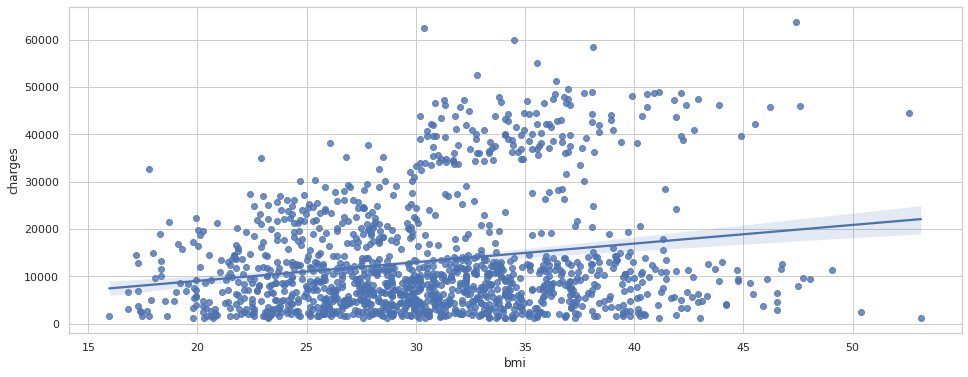

In [206]:
plt.figure(figsize=(16,6))

sns.regplot(x=df_insurance.bmi, y=df_insurance.charges)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

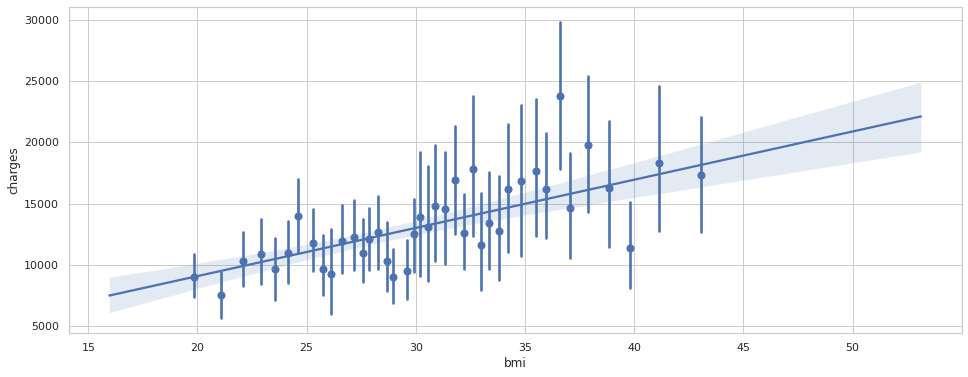

In [216]:
plt.figure(figsize=(16,6))

sns.regplot(x=df_insurance.bmi, y=df_insurance.charges, x_bins=40)

#### lmplot

> `seaborn.lmplot`__(*, x=None, y=None, data=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None, size=None)__

> **[lmplot seaborn wiki](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot)**

Parameters (some important):

> **x, y : strings, optional**

Input variables; these should be column names in data.

> **data : DataFrame**

Tidy (“long-form”) dataframe where each column is a variable and each row is an observation.

> **hue, col, row : strings**

Variables that define subsets of the data, which will be drawn on separate facets in the grid. See the *_order parameters to control the order of levels of this variable.

> **palette : palette name, list, or dict**

Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

> **col_wrap : int**

“Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.

> **height : scalar**

Height (in inches) of each facet. See also: aspect.

> **aspect : scalar**

Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.

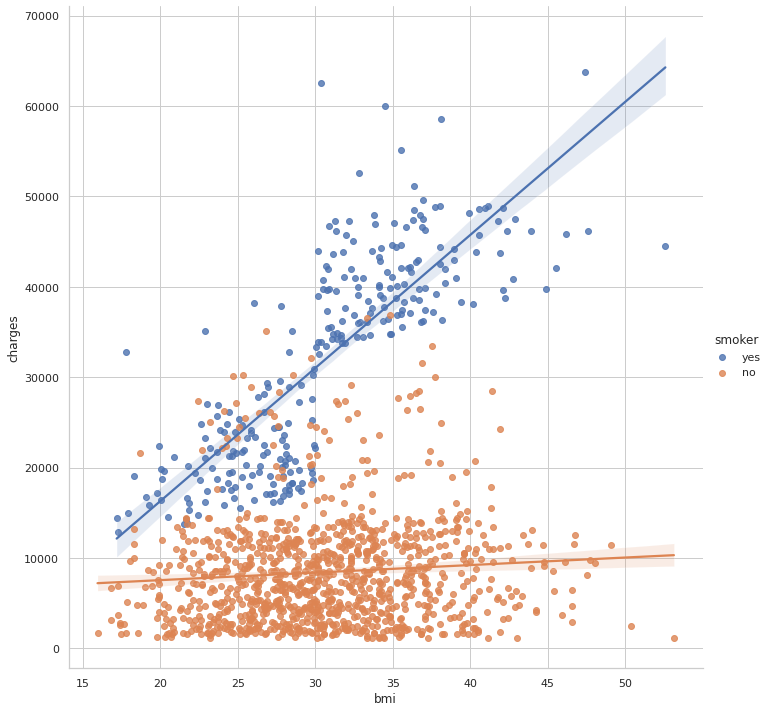

In [225]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df_insurance, height=10, aspect=1)

#### swarmplot

> `seaborn.swarmplot`)__(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)__

> **[swarmplot seaborn wiki](https://seaborn.pydata.org/generated/seaborn.swarmplot.html?highlight=swarmplot#seaborn.swarmplot)**

Parameters (some important):

> **x, y, hue : names of variables in data or vector data, optional**

Inputs for plotting long-form data. See examples for interpretation.

> **data : DataFrame, array, or list of arrays, optional**

Dataset for plotting. If `x` and `y` are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form.

> **order, hue_order : lists of strings, optional**

Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

> **dodge : bool, optional**

When using `hue` nesting, setting this to `True` will separate the strips for different hue levels along the categorical axis. Otherwise, the points for each level will be plotted in one swarm.

> **orient : “v” | “h”, optional**

Orientation of the plot (vertical or horizontal). This is usually inferred based on the type of the input variables, but it can be used to resolve ambiguity when both `x` and `y` are numeric or when plotting wide-form data.


/home/akira-ml/anaconda3/envs/ds-env/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

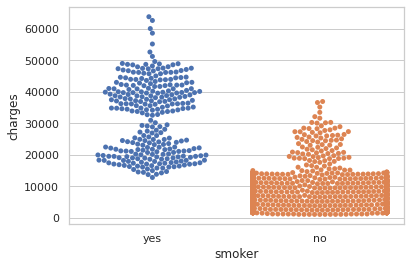

In [233]:
sns.swarmplot(x=df_insurance.smoker,
              y=df_insurance.charges)

### Distributions

***
#### Histograms

##### displot

> `seaborn.displot`__(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)__

> **[displot seaborn wiki](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)**

Parameters (some important):

> **data :** `pandas.DataFrame`, `numpy.ndarray`**, mapping, or sequence**

Input data structure. Either a long-form collection of vectors that can be assigned to named variables or a wide-form dataset that will be internally reshaped.

> **x, y : vectors or keys in datal**

Variables that specify positions on the x and y axes.

> **hue : vector or key in data**

Semantic variable that is mapped to determine the color of plot elements.

> **row, col : vectors or keys in data**

Variables that define subsets to plot on different facets.

> **kind : {“hist”, “kde”, “ecdf”}**

Approach for visualizing the data. Selects the underlying plotting function and determines the additional set of valid parameters.

> **rug : bool**

If True, show each observation with marginal ticks (as in rugplot()).



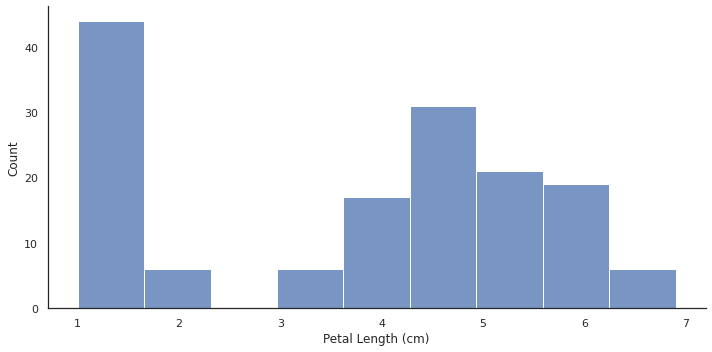

In [264]:
sns.set_style('white')

sns.displot(data=df_iris['Petal Length (cm)'], kind='hist', height=5, aspect=2)

### Density

#### kde-plot (from displot)

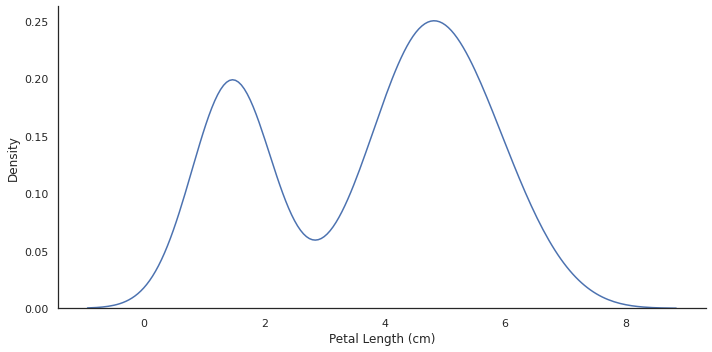

In [259]:
sns.displot(data=df_iris['Petal Length (cm)'], kind='kde', height=5, aspect=2)

#### 2D KDE plots (from displot)

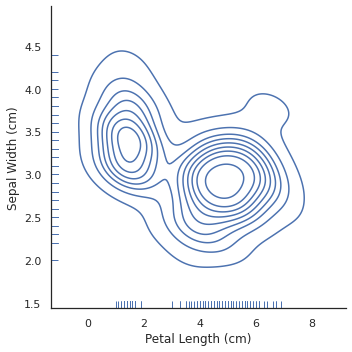

In [262]:
sns.displot(x=df_iris['Petal Length (cm)'], y=df_iris['Sepal Width (cm)'], kind='kde', rug=True)

### Color-coded plots


In [298]:
# Print the first 5 rows of the Iris versicolor data
df_iris_ver_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor


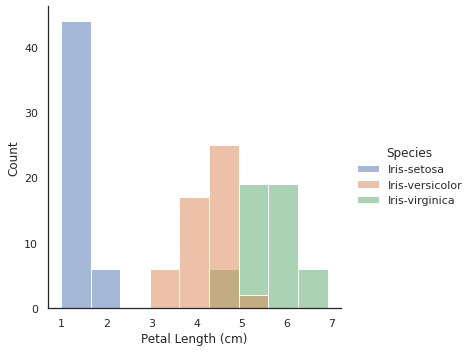

In [282]:
df_iris_big = pd.concat([df_iris_set_data, df_iris_ver_data, df_iris_vir_data])
sns.displot(data=df_iris_big, x='Petal Length (cm)', hue='Species')

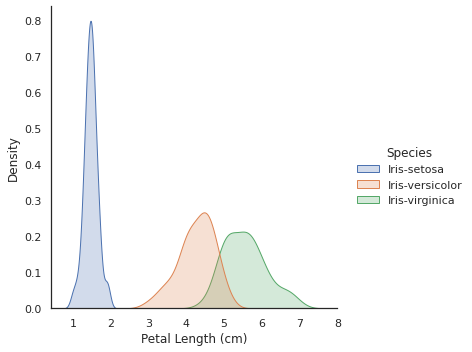

In [285]:
sns.displot(data=df_iris_big, x='Petal Length (cm)', kind='kde', hue='Species', fill=True)